In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn import datasets, preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

In [43]:
a=load_breast_cancer()
X=a.data
y=a.target

In [44]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=100)
classifier2=svm.SVC(kernel='linear')
model2=classifier2.fit(X_train,y_train)

In [45]:
y_pred = model2.predict(X_test)

In [46]:
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1])

In [47]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.956140350877193
Precision: 0.9545454545454546
Recall: 0.9692307692307692


In [48]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[46,  3],
       [ 2, 63]], dtype=int64)

<AxesSubplot:>

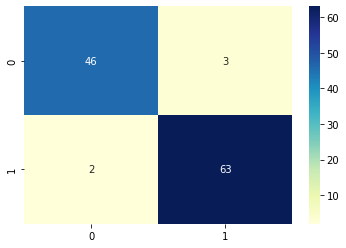

In [49]:
sns.heatmap(cnf_matrix, annot=True,cmap="YlGnBu" ,fmt='g')

C:\Users\haris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


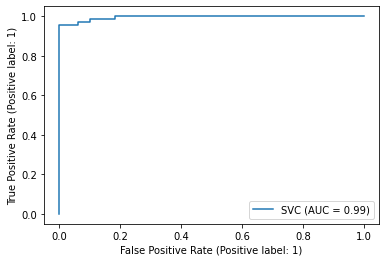

In [50]:
metrics.plot_roc_curve(model2, X_test,y_test)

In [51]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

In [52]:
result = cross_validate(model2 , X_train, y_train, cv = 10, scoring=['balanced_accuracy','f1','roc_auc'])
#print(result)

print("Training Balanced Accuracy: {}".format(result['test_balanced_accuracy'].mean()))
print("F1_score: {}".format(result['test_f1'].mean()))
print("Roc Auc: {}".format(result['test_roc_auc'].mean()))
model2.fit(X_train,y_train)

Training Balanced Accuracy: 0.9413991717376605
F1_score: 0.9610461516583806
Roc Auc: 0.9920364266396214


SVC(kernel='linear')